# Online Retail Association Rules Mining



In [1]:

# 1. Imports & dataset loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# -- Load dataset (single-column .xlsx of comma‑separated transactions)
FILE = 'Online retail.xlsx'  # 👈 make sure it's in the same directory
df_raw = pd.read_excel(FILE, header=None, names=['Items'])
print(f"Loaded {df_raw.shape[0]:,} rows.")
df_raw.head()


Loaded 7,501 rows.


,Items
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


🛒 Number of transactions: 7501
📦 Number of unique items : 119


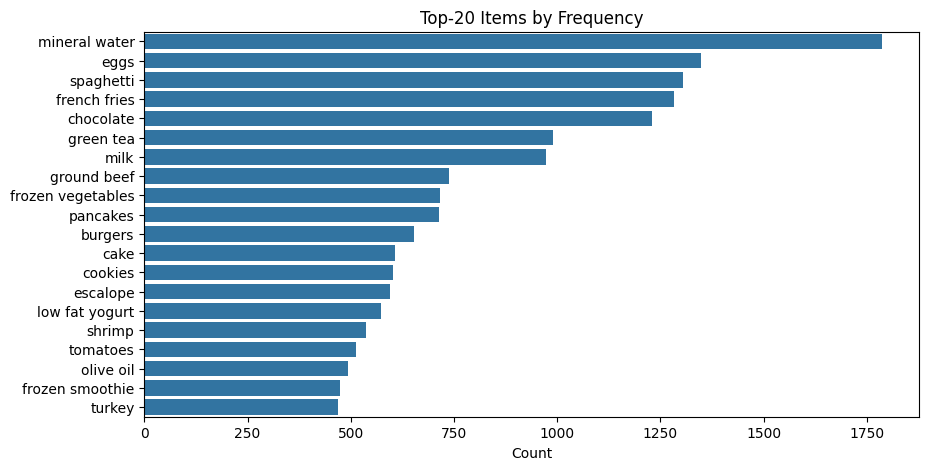

In [2]:

# 2. Quick EDA ----------------------------------------------------------
# Split string → list
transactions_list = df_raw['Items'].dropna().apply(lambda x: [i.strip() for i in x.split(',') if i])
num_tx = len(transactions_list)
all_items = [item for sublist in transactions_list for item in sublist]
num_items = len(set(all_items))

print(f"🛒 Number of transactions: {num_tx}")
print(f"📦 Number of unique items : {num_items}")

# Top‑20 most‑frequent items
item_counts = pd.Series(all_items).value_counts().head(20)
plt.figure(figsize=(10,5))
sns.barplot(x=item_counts.values, y=item_counts.index)
plt.title('Top‑20 Items by Frequency')
plt.xlabel('Count')
plt.ylabel('')
plt.show()


In [3]:

# 3. Transaction Encoding ----------------------------------------------
te = TransactionEncoder()
te_array = te.fit_transform(transactions_list)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)
df_encoded.head()


,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [4]:

# 4. Frequent Itemsets via Apriori --------------------------------------
MIN_SUPPORT = 0.02
freq_items = apriori(df_encoded, min_support=MIN_SUPPORT, use_colnames=True).sort_values('support', ascending=False)
print(f"Found {freq_items.shape[0]} frequent itemsets with support ≥ {MIN_SUPPORT}")
freq_items.head(10)


Found 103 frequent itemsets with support ≥ 0.02


,support,itemsets
34,0.238368,(mineral water)
13,0.179709,(eggs)
44,0.174110,(spaghetti)
17,0.170911,(french fries)
9,0.163845,(chocolate)
24,0.132116,(green tea)
33,0.129583,(milk)
25,0.098254,(ground beef)
22,0.095321,(frozen vegetables)
38,0.095054,(pancakes)


In [5]:

# 5. Association Rules --------------------------------------------------
MIN_CONFIDENCE = 0.3
rules = association_rules(freq_items, metric='confidence', min_threshold=MIN_CONFIDENCE)
# Sort by lift descending
rules = rules.sort_values('lift', ascending=False).reset_index(drop=True)
print(f"Generated {rules.shape[0]} rules with confidence ≥ {MIN_CONFIDENCE}")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(15)


Generated 20 rules with confidence ≥ 0.3


,antecedents,consequents,support,confidence,lift
0,(ground beef),(spaghetti),0.039195,0.398915,2.291162
1,(olive oil),(spaghetti),0.022930,0.348178,1.999758
2,(soup),(mineral water),0.023064,0.456464,1.914955
3,(burgers),(eggs),0.028796,0.330275,1.837830
4,(olive oil),(mineral water),0.027596,0.419028,1.757904
5,(tomatoes),(spaghetti),0.020931,0.306043,1.757755
6,(ground beef),(mineral water),0.040928,0.416554,1.747522
7,(cooking oil),(mineral water),0.020131,0.394256,1.653978
8,(chicken),(mineral water),0.022797,0.380000,1.594172
9,(frozen vegetables),(mineral water),0.035729,0.374825,1.572463


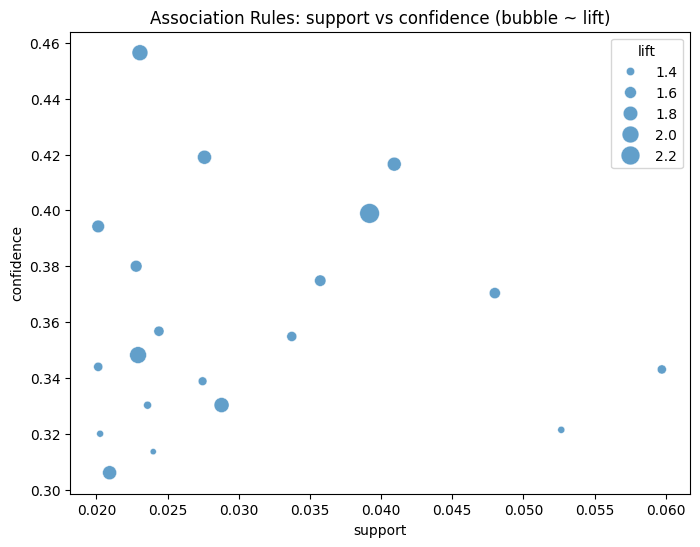

In [6]:

# 6. Rule quality scatter ----------------------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(20,200), alpha=0.7)
plt.title('Association Rules: support vs confidence (bubble ~ lift)')
plt.show()


INTERVEIW QUESTIONS
1. What is Lift and why is it important in Association Rules?
Lift measures how much more likely items Y are purchased when X is purchased, compared to how often Y would occur by itself.

Formula:
Lift
(
𝑋
⇒
𝑌
)
=
Confidence
(
𝑋
⇒
𝑌
)
Support
(
𝑌
)
Lift(X⇒Y)=
Support(Y)
Confidence(X⇒Y)
​

Interpretation:
Lift > 1: Positive association (X and Y appear together more than expected).

Lift = 1: No association (X and Y are independent).

Lift < 1: Negative association (X reduces the chance of Y).

Why it's important:
Lift helps you:

Filter out misleading rules with high confidence but no real dependency.

Focus on meaningful patterns, not just frequent items.

Example:
If customers who buy bread also buy butter and Lift = 3, it means they’re 3 times more likely to buy butter when they buy bread compared to random chance.

2. What is Support and Confidence? How are they calculated?
Support
The proportion of transactions in which the itemset appears.

Support
(
𝑋
)
=
Number of transactions containing
𝑋
Total number of transactions
Support(X)=
Total number of transactions
Number of transactions containing X
​

✅ Used to eliminate rare combinations that are statistically insignificant.

Confidence
The likelihood of itemset Y being purchased given that X is purchased.

Confidence
(
𝑋
⇒
𝑌
)
=
Support
(
𝑋
∪
𝑌
)
Support
(
𝑋
)
Confidence(X⇒Y)=
Support(X)
Support(X∪Y)
​

✅ Helps assess how reliable the rule is.

Example:
If out of 1000 transactions:

100 contain milk

80 contain milk and bread

Then:

Support(milk and bread) = 80 / 1000 = 0.08

Confidence(milk ⇒ bread) = 80 / 100 = 0.80

If support(bread) = 0.20, then Lift = 0.80 / 0.20 = 4

3. What are some limitations or challenges of Association Rule Mining?
Here are the key ones:

Limitation	Explanation
Too many rules	Even with filters, the algorithm may generate thousands of rules—many uninteresting.
No causality	Just because items occur together doesn’t mean one causes the other.
Requires lots of data	Sparse or small datasets may produce unreliable or irrelevant patterns.
Doesn't handle sequences	Order of purchase isn't considered (e.g., milk before bread).
Threshold tuning is hard	Choosing right values for support, confidence, and lift often needs trial-and-error.
Cold start problem	New items or users with limited data are not well handled.